In [1]:
import numpy as np
import pandas as pd
from pandas import Timedelta as td
import matplotlib.pyplot as plt
import os
from utils.audio_to_logits import infer_character_distribution, alphabet, STEP_MS
from utils.text import preprocess_transcript, preprocess_audio
import pickle

In [2]:
audio_file = 'in/02.wav'
start_s, end_s = 3 * 60 + 7, 8 * 60 + 47  # None, None  # seconds of start and end of the target clip

# Convert audio to correct format in a temp .wav file
wav_audio_file = 'in/in.wav'
preprocess_audio(in_file=audio_file, out_file=wav_audio_file)#, start_sec=start_s, end_sec=end_s)

# logits = infer_character_distribution(wav_audio_file)
# with open("assets/logits.pickle", "wb") as f:
#     pickle.dump(logits, f)

with open("assets/logits-02.pickle", "rb") as f:
    logits = pickle.load(f)

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 11.1.0
  configuration: --prefix=/Users/breedoon/.conda/envs/CP --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1627813741069/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc    55.  7.100 / 55.  7.100
Guessed Channel Layout for Input Stream #0.0 : mono
Input #0

In [3]:
text_file = 'in/02.txt'
frm, to = 'a definite number of', 'lost their validity'  # first words to include and last words to include
transcript = preprocess_transcript(text_file)#, frm, to)

In [4]:
alph = np.array(list(alphabet._str_to_label.keys()) + ['-'])
timesteps = pd.timedelta_range(start=td(0), periods=logits.shape[0], freq=td(f'{STEP_MS} ms'))
probdist = pd.DataFrame(logits,
                        index=timesteps,
                        columns=alph)
probdist

,,a,b,c,d,e,f,g,h,i,...,s,t,u,v,w,x,y,z,',-
0 days 00:00:00,0.000003,0.000002,4.722378e-07,0.000002,0.000002,6.135077e-07,5.675431e-07,7.499115e-06,0.000001,0.000002,...,0.000003,0.000005,2.254227e-07,7.786390e-08,0.000005,4.758345e-08,7.173285e-07,9.496250e-09,1.197065e-07,0.999952
0 days 00:00:00.020000,0.000002,0.000004,2.328874e-06,0.000002,0.000002,6.063077e-07,7.739679e-07,1.532533e-06,0.000003,0.000009,...,0.000002,0.000022,3.775565e-07,1.288826e-07,0.000008,3.183090e-08,1.338744e-05,4.754751e-09,8.220932e-08,0.999912
0 days 00:00:00.040000,0.000003,0.000007,2.105426e-06,0.000001,0.000001,4.101693e-07,9.605844e-07,5.461937e-07,0.000004,0.000009,...,0.000002,0.000005,1.826362e-06,4.323679e-08,0.000009,1.527155e-08,1.921553e-05,2.554006e-09,2.144887e-07,0.999923
0 days 00:00:00.060000,0.000004,0.000006,4.423813e-06,0.000002,0.000003,1.058558e-06,1.572705e-06,5.010332e-07,0.000003,0.000014,...,0.000002,0.000005,2.332218e-06,7.525382e-08,0.000008,2.433160e-08,2.160310e-05,3.204242e-09,3.303069e-07,0.999905
0 days 00:00:00.080000,0.000002,0.000005,4.380126e-06,0.000001,0.000002,8.602177e-07,9.847848e-07,5.751519e-07,0.000002,0.000009,...,0.000001,0.000003,3.028960e-06,7.715675e-08,0.000006,2.648024e-08,1.972882e-05,2.808779e-09,3.102240e-07,0.999925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:26:58.780000,0.057455,0.036645,3.177409e-02,0.033453,0.028811,3.308385e-02,3.251285e-02,2.694841e-02,0.036057,0.034513,...,0.042472,0.046500,2.633141e-02,2.892594e-02,0.032510,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:26:58.800000,0.057455,0.036645,3.177409e-02,0.033453,0.028811,3.308385e-02,3.251285e-02,2.694841e-02,0.036057,0.034513,...,0.042472,0.046500,2.633141e-02,2.892594e-02,0.032510,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:26:58.820000,0.057455,0.036645,3.177409e-02,0.033453,0.028811,3.308385e-02,3.251285e-02,2.694841e-02,0.036057,0.034513,...,0.042472,0.046500,2.633141e-02,2.892594e-02,0.032510,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960
0 days 00:26:58.840000,0.057455,0.036645,3.177409e-02,0.033453,0.028811,3.308385e-02,3.251285e-02,2.694841e-02,0.036057,0.034513,...,0.042472,0.046500,2.633141e-02,2.892594e-02,0.032510,2.241859e-02,3.057502e-02,1.741794e-02,1.773833e-02,0.098960


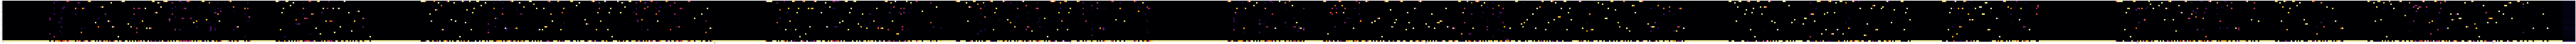

In [16]:
plt.figure(figsize=(len(probdist) / 5, 20))
plt.imshow(logits.T, cmap='inferno')
plt.yticks(np.arange(len(alph)), alph)
plt.tight_layout()
plt.show()

In [187]:
# Top three characters for every sime step
top_chars = logits.argsort(axis=1)[:, ::-1]
top_n_chars = 3

top = np.hstack([
    alph[top_chars][:, :top_n_chars],
    logits[np.repeat([np.arange(top_chars.shape[0])], top_n_chars, axis=0).T, top_chars[:, :top_n_chars]].round(2)
])
pd.DataFrame(top, index=timesteps)

,0,1,2,3,4,5
0 days 00:00:00,-,a,y,1.0,0.0,0.0
0 days 00:00:00.020000,-,t,y,1.0,0.0,0.0
0 days 00:00:00.040000,-,y,t,1.0,0.0,0.0
0 days 00:00:00.060000,-,y,i,1.0,0.0,0.0
0 days 00:00:00.080000,-,y,i,1.0,0.0,0.0
...,...,...,...,...,...,...
0 days 00:00:36.060000,-,,t,0.1,0.06,0.05
0 days 00:00:36.080000,-,,t,0.1,0.06,0.05
0 days 00:00:36.100000,-,,t,0.1,0.06,0.05
0 days 00:00:36.120000,-,,t,0.1,0.06,0.05


In [5]:
import struct
import wave


def read_samples(wave_file, nb_frames):
    frame_data = wave_file.readframes(nb_frames)
    if frame_data:
        sample_width = wave_file.getsampwidth()
        nb_samples = len(frame_data) // sample_width
        format = {1: "%db", 2: "<%dh", 4: "<%dl"}[sample_width] % nb_samples
        return struct.unpack(format, frame_data)
    else:
        return ()


w = wave.open(wav_audio_file, 'r')
samples = np.array(read_samples(w, w.getnframes()))
sub_samples = samples  #[int(start_s * w.getframerate()):int(end_s * w.getframerate())].copy()

# step_samples = sub_samples.reshape((-1, w.getframerate() * STEP_MS // 1000))
# len(step_samples)
# step_volume = np.abs(step_samples).mean(axis=1)
#
# step_volume_scores = 1 - pd.Series(step_volume).rank(pct=True).values
# step_volume_scores = np.hstack([step_volume_scores, [1] * (len(logits) - len(step_volume))])

In [441]:
words = transcript.split()
sub_transcript = ' ' + ' '.join(words[1:6])
sub_transcript += '-' * ((len(logits) - len(sub_transcript)) // 2)
sub_transcript = '-' * len(transcript)

spaces = np.argwhere(np.array(list(transcript)) == ' ')[:, 0]
word_starts = spaces[:-1] + 1
word_ends = spaces[1:]  # - 1
rolling_words = 20
sub_transcripts = []
for i in range(len(word_starts) - rolling_words + 1):
    sub_transcripts.append(
        '-' * word_starts[i]
        + transcript[word_starts[i]:word_ends[i + rolling_words - 1]]
        + '-' * (len(transcript) - word_ends[i + rolling_words - 1])
    )

In [6]:
sub_transcript = ' ' + transcript.replace(' ', '') + ' '
sub_transcript = transcript

In [7]:
# start_s, end_s = 89, 125  # len(logits) * STEP_MS / 1000 # 5.2  # seconds of start and end of the target clip
start_t, end_t = 0, len(logits)  # int(start_s * 1000 / STEP_MS), int(end_s * 1000 / STEP_MS) + 1  # +1 b/c end-exclusive

probs = logits.copy()[start_t:end_t, :]  # the progressive dawn
probs[:, 0] += probs[:, -1]  # mix spaces and blanks (they seem to be mixed up anyway)

# If the model inserts a blank or a space after a character,
# prolong that character's probability so that DTW simply repeats it,
# instead of stopping the thread, for example:
#   blank  d    a    w        blank  d    a    w
#     0    0.8  0    0          0    0.8  0    0
#     0.5  0.1  0    0          0.5  0.5  0    0
#     0.8  0    0    0    ->    0.8  0.4  0    0
#     0.1  0    0.7  0          0.1  0    0.7  0
#     0    0    0    0.7        0    0    0    0.7
for i in range(1, len(probs)):
    probs[i, 1:-1] += probs[i, 0] * probs[i - 1, 1:-1]
    # probs[i, 0] = probs[i, 0] * step_volume_scores[i]
    # probs[i, [0, -1]] = 1 - probs[i, 1:-1].sum()
    # probs[i, :-1] += probs[i, -1] * probs[i - 1, :-1]
    # probs[i, [0, -1]] = 1 - probs[i, :-1].sum()

trpt_ind_map = pd.Series(np.arange(len(alph)), index=alph)

trpt_inds = trpt_ind_map[list(sub_transcript)].values
# p_fit = probs[:, trpt_inds]
probs[:, -1] = 0
# probs[200:] = 0
# probs[400:] = 0
# mapping = pd.DataFrame(p_fit, columns=list(transcript))
# mapping

In [ ]:
import utils.fastdtw
from importlib import reload

reload(utils.fastdtw)
from utils.fastdtw import dtw

dist, path = dtw(np.arange(len(probs)), trpt_inds,
                     dist=lambda mat_i, trpt_i: -probs[int(mat_i), int(trpt_i)])
print('fit:', -dist / len(logits))

In [562]:
from numpy.lib.stride_tricks import sliding_window_view

sliding_step = 200
overlap_n = 1
intervals = np.arange(0, len(logits), sliding_step)
windows = sliding_window_view(
    (intervals[:, np.newaxis] + np.arange(0, sliding_step, sliding_step // overlap_n)[np.newaxis, :]),
    window_shape=(2, 1)).reshape((-1, 2))  #[:-overlap_n+1]
windows = windows[:len(windows) - overlap_n + 1]
trpt_start_ind = 0
paths = []
for frm, to in windows:
    costs = probs[frm:].copy()
    costs[to:] = 0
    _, window_path =  fastdtw(np.arange(len(costs)), trpt_inds[trpt_start_ind:], radius=20,
                     dist=lambda mat_i, trpt_i: -costs[int(mat_i), int(trpt_i)])
    trpt_start_ind = to #- 1
    paths.append(window_path[:sliding_step])

IndexError: tuple index out of range

In [394]:
paths = []
for st in tqdm(sub_transcripts):
    dist, path = fastdtw(np.arange(len(probs)), trpt_ind_map[list(st)].values, radius=20,
                         dist=lambda mat_i, trpt_i: -probs[int(mat_i), int(trpt_i)])
    paths.append(path)


100%|██████████| 107/107 [02:32<00:00,  1.42s/it]


In [398]:
paths_arr = np.array(paths)
final_path = paths_arr[0].copy()

np.array(path)
for i in range(len(word_starts) - rolling_words + 1):
    final_path
    sub_transcripts.append(
        '-' * word_starts[i]
        + transcript[word_starts[i]:word_ends[i + rolling_words - 1]]
        + '-' * (len(transcript) - word_ends[i + rolling_words - 1])
    )

(1808, 2)

In [365]:
# transcript = ' ' + ' '.join(transcript.split(' ')[1:-1][:20])
#
# from dtw import dtw
#
# trpt_inds = trpt_ind_map[list(transcript)].values
# dtw_res = dtw(np.arange(len(probs)),
#               trpt_inds, dist_method=lambda mat_i, trpt_i:
#     0.1 - probs[int(mat_i), int(trpt_i)], open_end=True)
#
# print('fit:', -dtw_res.distance / len(dtw_res.index1))
# path = list(zip(dtw_res.index1, dtw_res.index2))

In [1]:
true_duration = len(sub_samples) // (w.getframerate() * STEP_MS // 1000)
shift_by_ts = len(logits) - true_duration  # shift transcript back by 10 * 20 = 200 ms

sub_path = np.array(path)
sub_path[:-shift_by_ts, 1] = sub_path[shift_by_ts:, 1]
sub_path_cost = probs[sub_path[:, 0], trpt_inds[sub_path[:, 1]]]
# np.roll(sub_path[:, 1], shift_by_ts)[shift_by_ts:]

NameError: name 'sub_samples' is not defined

In [632]:
# old_inds = pd.Series(np.arange(len(transcript)))
# old_inds_map = pd.Series(old_inds[~old_inds.isin(word_starts[1:] - 1)].values)
# sub_path[:, -1] = old_inds_map[sub_path[:, -1]].values
# sub_transcript = transcript

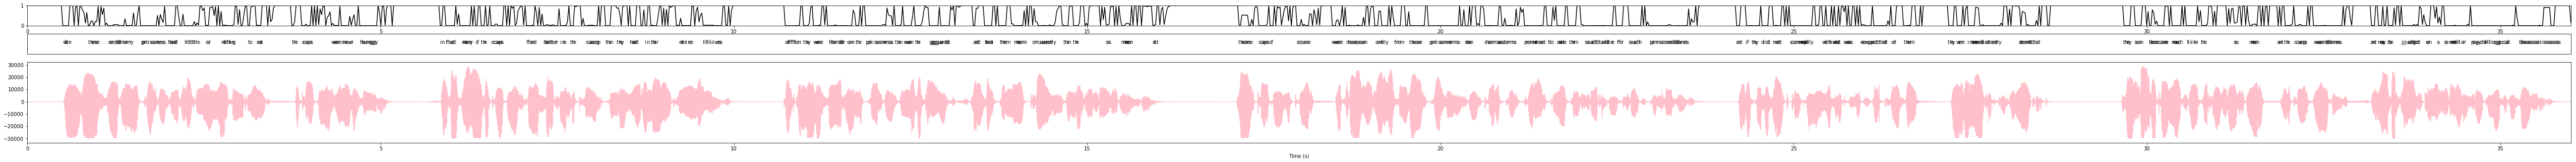

In [642]:
sub_transcript = sub_transcript.replace('-', ' ')

fig, [ax3, ax1, ax2] = plt.subplots(nrows=3, ncols=1, figsize=(end_t / 20, 5),
                                    gridspec_kw=dict(height_ratios=[1, 1, 4]))

t = np.linspace(0, len(sub_samples) / w.getframerate(), len(sub_samples))
ax2.plot(t, sub_samples, color='pink', lw=1)

next_j = sub_path[1][1]
for i, (rec_i, trpt_i) in enumerate(sub_path[:-1]):
    next_j = sub_path[i + 1][1]
    if rec_i != next_j:
        ax1.annotate(sub_transcript[trpt_i], xy=(rec_i * STEP_MS / 1000, 0.5))
    # print(i, j, transcript[i])

ax3.plot(np.linspace(0, len(probs) * STEP_MS / 1000, num=len(probs)), sub_path_cost, color='k')
# ax3.set_yscale('log')
ax3.set_ylim(0, 1)
ax1.axes.get_xaxis().set_visible(False)

ax3.set_xlim(0, t.max())
ax2.set_xlim(0, t.max())
ax1.set_xlim(0, t.max())

ax2.set_xlabel('Time (s)')
# hide axes for text
ax1.axes.get_yaxis().set_visible(False)
ax1.axes.get_xaxis().set_visible(False)
plt.gcf().savefig('out/fit.png')
plt.show()

In [18]:
len(logit) * 0.02 / 60

5.669333333333333

In [ ]:
from matplotlib import animation
from tqdm import tqdm

# trpt_inds = trpt_ind_map[list(transcript)].values

spaces = np.argwhere(trpt_inds == 0)[:, 0]
word_starts = spaces[:-1] + 1
word_ends = spaces[1:]  # - 1

ind_word_mad = pd.Series([np.nan] * len(trpt_inds))
ind_word_mad[word_starts] = np.arange(len(word_starts))
ind_word_mad = ind_word_mad.ffill()

# sub_path_cost[word_starts[55]:word_ends[55]].mean()

def animate(step):
    plt.gca().axis('off')
    trpt_i = sub_path[step][1]
    word_i = ind_word_mad[trpt_i]
    if pd.isna(word_i):  # words haven't began yet
        word = ''
    else:
        word_i = int(word_i)
        word = sub_transcript[word_starts[word_i]: word_ends[word_i]]
    return [plt.annotate(word, xy=(0.5, 0.5), fontsize=26, ha='center', va='center')]


class tqdmlist(list):
    """Custom class to show the progress of the animation creation with tqdm (to not bother with progress callback)"""

    def __iter__(self):
        return self.tqdm_iter(super(tqdmlist, self).__iter__())

    @staticmethod
    def tqdm_iter(itr):
        for it in tqdm(list(itr)):  # to list to show progress
            yield it


fig = plt.figure()

frames = tqdmlist([animate(step) for step in tqdm(range(len(sub_path)))])
anim = animation.ArtistAnimation(fig, frames, interval=STEP_MS, blit=True)

animation_output_file = 'out/animation.mp4'

# If animation file already exists
if os.path.exists(animation_output_file):
    os.remove(animation_output_file)

anim.save('out/animation.mp4', writer='ffmpeg')
output_file = 'out/out.mp4'

if os.path.exists(output_file):
    os.remove(output_file)

cmd = f"ffmpeg -i out/animation.mp4 -i {wav_audio_file} -c:v copy -c:a aac {output_file}"
os.system(cmd)

# Remove animation file
os.remove(animation_output_file)

  4%|▎         | 783/22142 [01:18<35:51,  9.93it/s]


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '50.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'out/animation.mp4']' returned non-zero exit status 255.

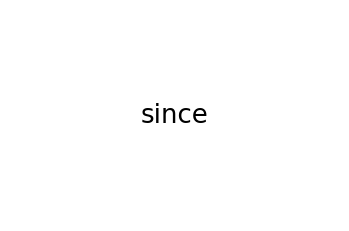

In [14]:
from matplotlib import animation
from tqdm import tqdm

# trpt_inds = trpt_ind_map[list(transcript)].values

spaces = np.argwhere(trpt_inds == 0)[:, 0]
word_starts = spaces[:-1] + 1
word_ends = spaces[1:]  # - 1

ind_word_mad = pd.Series([np.nan] * len(trpt_inds))
ind_word_mad[word_starts] = np.arange(len(word_starts))
ind_word_mad = ind_word_mad.ffill()

# sub_path_cost[word_starts[55]:word_ends[55]].mean()

def animate(step):
    plt.gca().axis('off')
    trpt_i = sub_path[step][1]
    word_i = ind_word_mad[trpt_i]
    if pd.isna(word_i):  # words haven't began yet
        word = ''
    else:
        word_i = int(word_i)
        word = sub_transcript[word_starts[word_i]: word_ends[word_i]]
    return [plt.annotate(word, xy=(0.5, 0.5), fontsize=26, ha='center', va='center')]


class tqdmlist(list):
    """Custom class to show the progress of the animation creation with tqdm (to not bother with progress callback)"""

    def __iter__(self):
        return self.tqdm_iter(super(tqdmlist, self).__iter__())

    @staticmethod
    def tqdm_iter(itr):
        for it in tqdm(list(itr)):  # to list to show progress
            yield it


fig = plt.figure()

frames = tqdmlist([animate(step) for step in tqdm(range(len(sub_path)))])
anim = animation.ArtistAnimation(fig, frames, interval=STEP_MS, blit=True)

animation_output_file = 'out/animation.mp4'

# If animation file already exists
if os.path.exists(animation_output_file):
    os.remove(animation_output_file)

anim.save('out/animation.mp4', writer='ffmpeg')
output_file = 'out/out.mp4'

if os.path.exists(output_file):
    os.remove(output_file)

cmd = f"ffmpeg -i out/animation.mp4 -i {wav_audio_file} -c:v copy -c:a aac {output_file}"
os.system(cmd)

# Remove animation file
os.remove(animation_output_file)